In [1]:
# Use PyTorch to build neural networkabs
# Inspired by pytorch workshop conducted in MSBD 5001 course

# Import required packages
import os
import numpy as np
import pandas as pd
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.transforms import ToPILImage
import matplotlib.pyplot as plt

In [2]:
# Import the yield data as pandas data frame (Note this is saved as a csv file in base working directory)
file_path = os.path.join(os.getcwd()) + '/'
file_name = 'Crop_Yields.csv'
yield_data = pd.read_csv(file_path + file_name)

In [3]:
# Create class to load dataset

class CustomImageDataset():
    def __init__(self, hist_dir, crop_yield_table, transform=None, target_transform=None):  
        self.hist_dir = hist_dir # References the directory for each given country where the data is stored
        self.transform = transform
        self.target_transform = target_transform
        # load the files 
        filenames = [] # For every year, yields a numpy array of dimension 576 x 29
        crop_yields = []
        for filename in os.listdir(hist_dir):
            filenames.append(filename)
            crop_yields.append(crop_yield_table[crop_yield_table.Year == int(filename[-8:-4])]['Cereal Yield'].values[0])
        self.filenames = filenames
        self.crop_yields =crop_yields
        
    def __len__(self):
        return len(self.filenames)

    def __getitem__(self, idx):
        hist_dir = os.path.join(self.hist_dir, self.filenames[idx])
        # hist = Image.open(hist_dir)
        hist = np.load(hist_dir)
        crop_yield = self.crop_yields[idx]
        if self.transform:
            hist = self.transform(hist).float()
        if self.target_transform:
            crop_yield = self.target_transform(crop_yield).float()
        return hist, crop_yield

In [4]:
from torchvision.transforms import Resize, ToTensor, Compose

crop_dataset = CustomImageDataset("./kenya", crop_yield_table = yield_data, transform = ToTensor())
# print(dataset.filenames)
# print(dataset.crop_yields)
# dataset[3]

In [5]:
crop_dataset[3] # Shows for a given tensor which consists of a pair of 1) array of binned histogram data; and 2) yield output

(tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0066, 0.0000, 0.0000],
          [0.0658, 0.2105, 0.0263,  ..., 0.0724, 0.0000, 0.0000],
          [0.1974, 0.3224, 0.6250,  ..., 0.2500, 0.3355, 0.0461],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]]),
 1.74)

In [6]:
crop_dataset[3][0].shape

torch.Size([1, 576, 29])

In [7]:
crop_dataset[3][0].shape # For each binned histogram data, consists of 576 observations across 29 dimensions

torch.Size([1, 576, 29])

type of the image:  <class 'torch.Tensor'>
Yield: 1.24


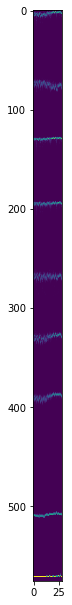

In [8]:
# Plot data for one sample pair
raw_image, crop_yield = crop_dataset[0]
figure = plt.figure()
figure.set_size_inches(18.5, 10.5)

print("type of the image: ", type(raw_image))

if type(raw_image) == torch.Tensor:
    plt.imshow(ToPILImage()(raw_image))
else:
    plt.imshow(raw_image)
    
print(f"Yield: {crop_yield}")

In [9]:
raw_image.shape

torch.Size([1, 576, 29])